In [3]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from cycler import cycler

In [4]:
#importing excel file and removing rows with null values
df = pd.read_csv('https://data.ca.gov/dataset/da1978f2-068c-472f-be2d-04cdec48c3d9/resource/7d2f11a4-cc0f-4189-8ba4-8bee05493af1/download/logistics_ppe.csv', dtype={'county': object, 'product_family': object,'quantity_filled': float, 'shipping_zip_postal_code': object, 'as_of_date': object})
df['as_of_date']= pd.to_datetime(df['as_of_date'])  
df = df.dropna(subset=['quantity_filled'])

In [5]:
pop_df = pd.read_csv('https://bythenumbers.sco.ca.gov/api/views/da2q-agh9/rows.csv?accessType=DOWNLOAD', dtype={'Entity Name': object, 'Fiscal Year': object,'Total Revenues': float, 'Estimated Population': float, 'Revenues Per Capita': float})
pop_df = pop_df.loc[pop_df['Fiscal Year'] == '2018'].copy()

In [6]:
color_array = ['#FF6633', '#FFB399', '#FF33FF', '#FFFF99', '#00B3E6', 
               '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D',
               '#80B300', '#809900', '#E6B3B3', '#6680B3', '#ffcc13', 
               '#FF99E6', '#CCFF1A', '#FF1A66', '#E6331A', '#33FFCC',
               '#B366CC', '#FF756D', '#B33300', '#CC80CC', '#E666B3',
               '#99E6E6', '#6666FF', '#850101', '#C90070', '#3AAFD9', 
               '#f07613', '#9B00FF', '#561f65', '#211b1b', '#46e100', 
               '#33991A', '#CC9999', '#FF69B4', '#4D8066', '#ee5b6c', 
               '#E6FF80', '#1AFF33', '#FF3380', '#CCCC00', '#66E64D', 
               '#FF9933', '#9900B3', '#E64D66', '#32174d', '#FF4D4D', 
               '#C4E5F2', '#d8bfd8', '#a4413c', '#b60093', '#9955d0', 
               '#142d80', '#9d1c61', '#f19f80', '#30ffef', '#9cb2b2'];

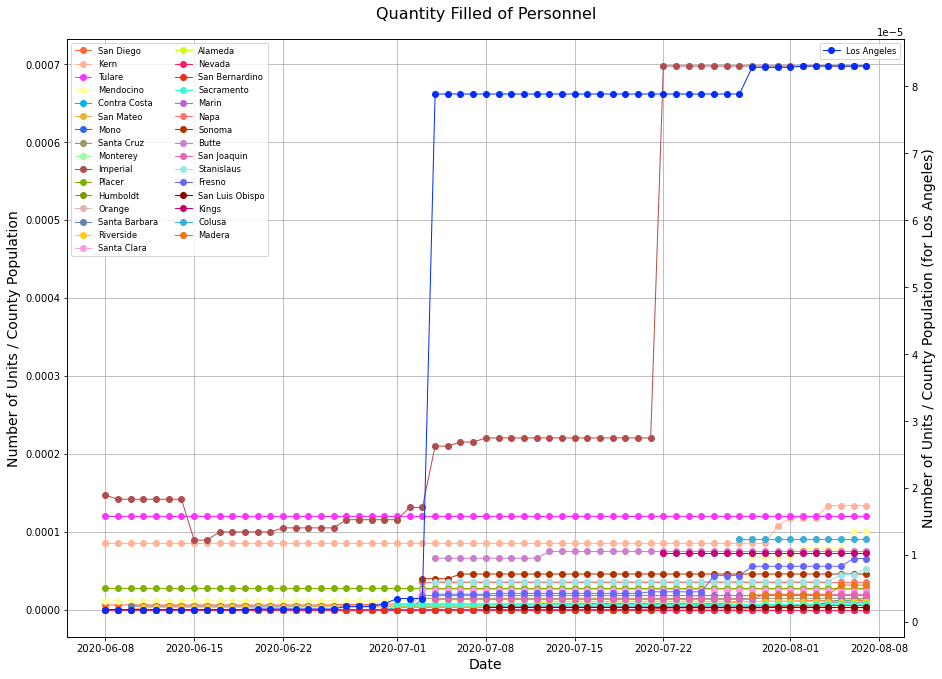

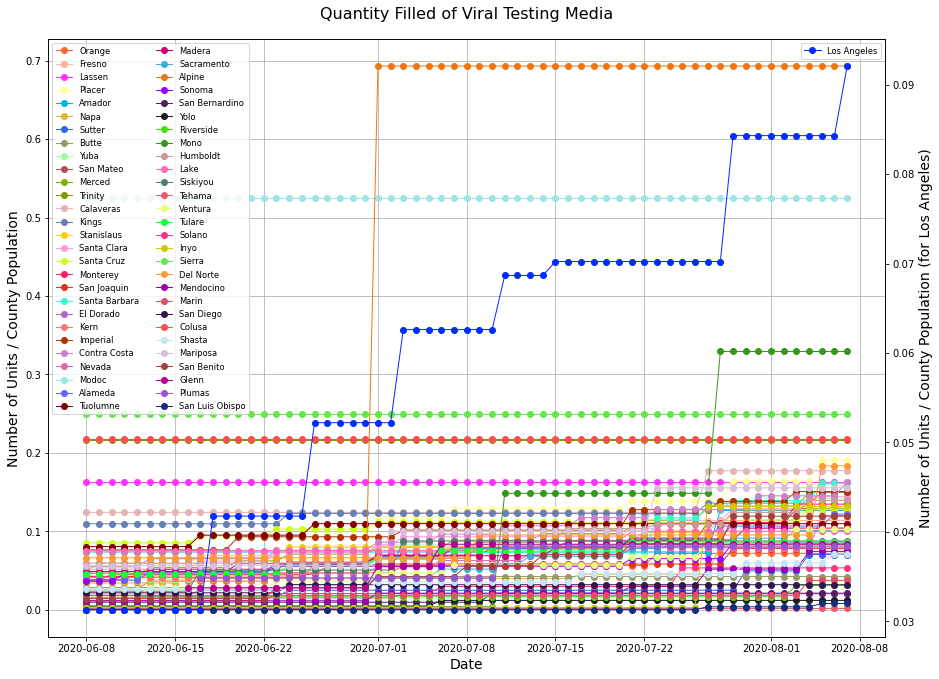

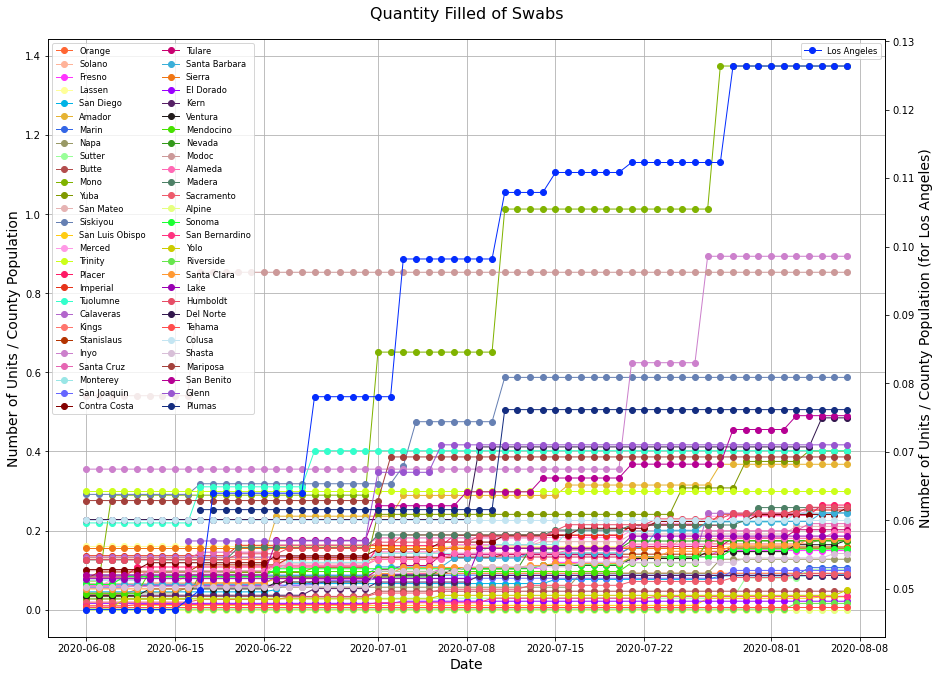

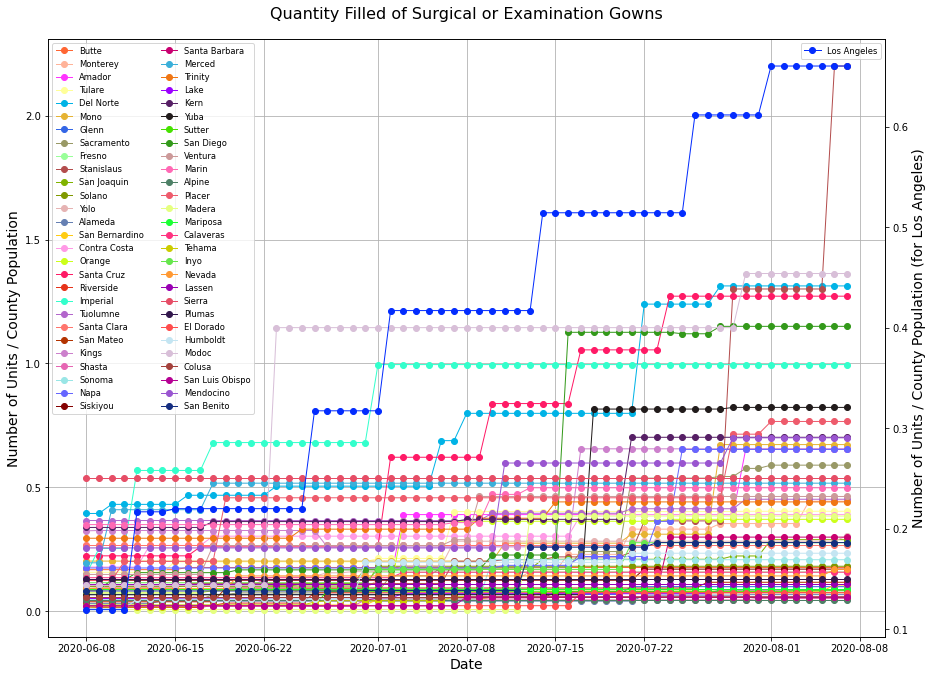

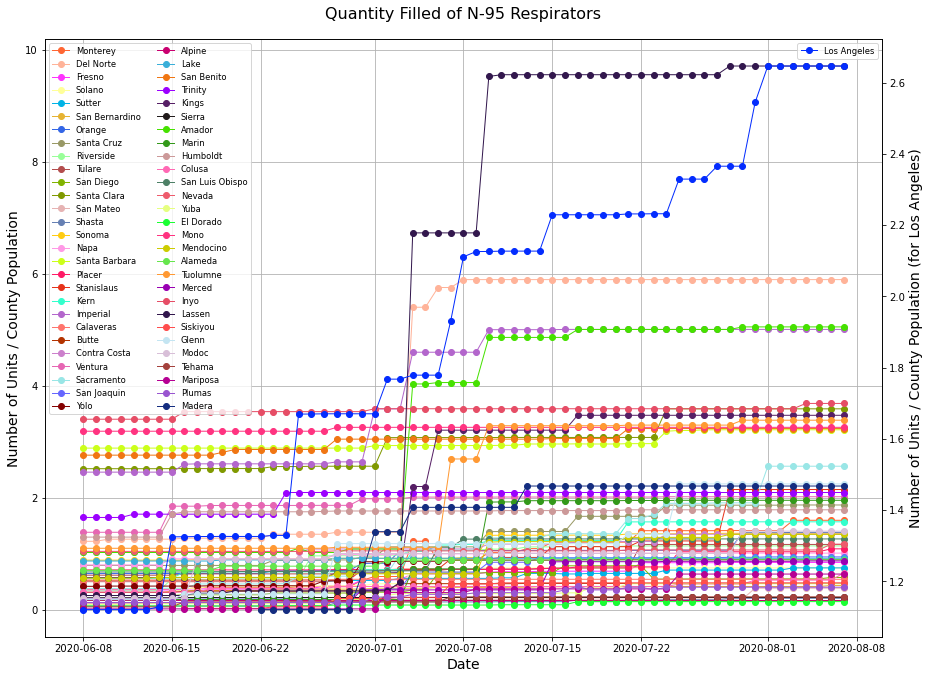

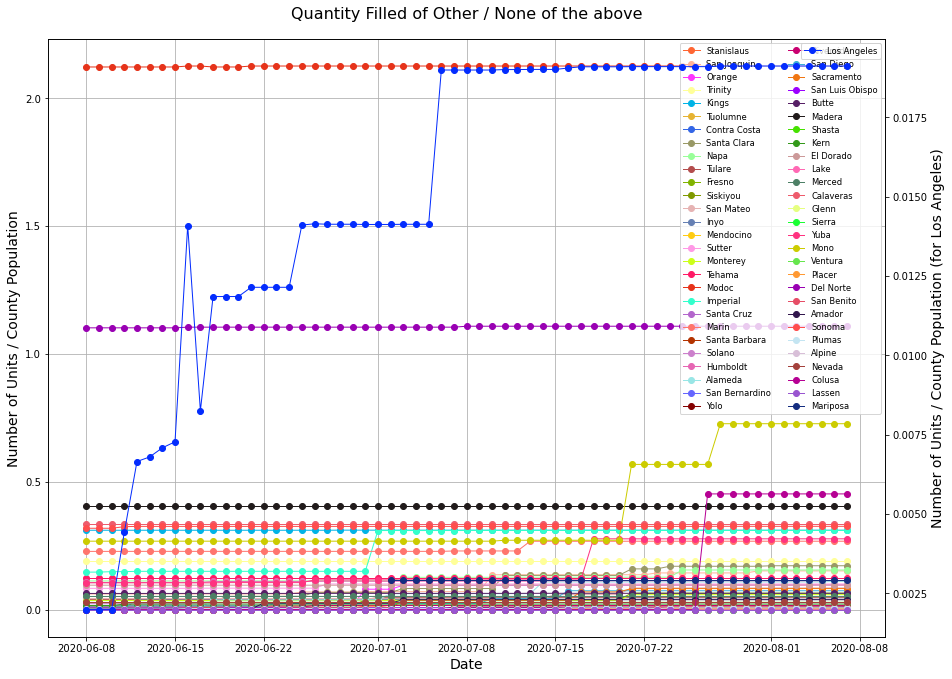

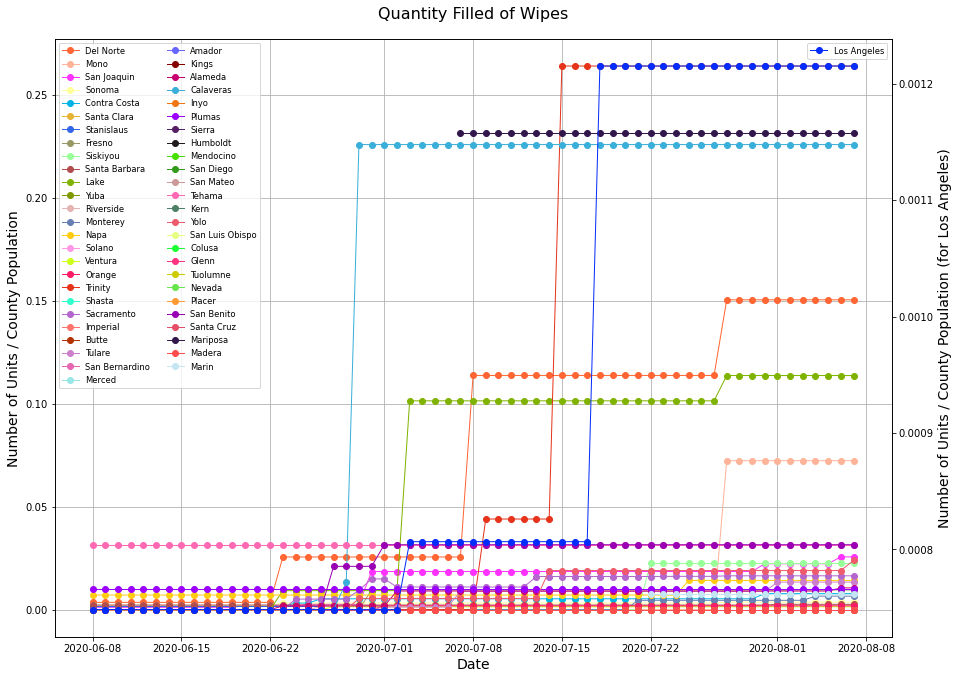

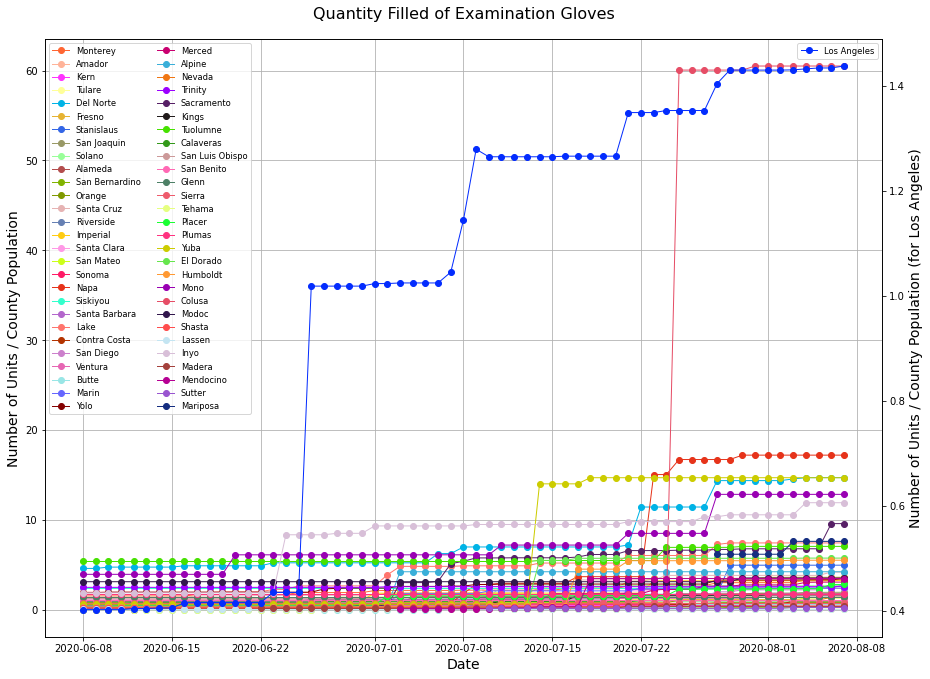

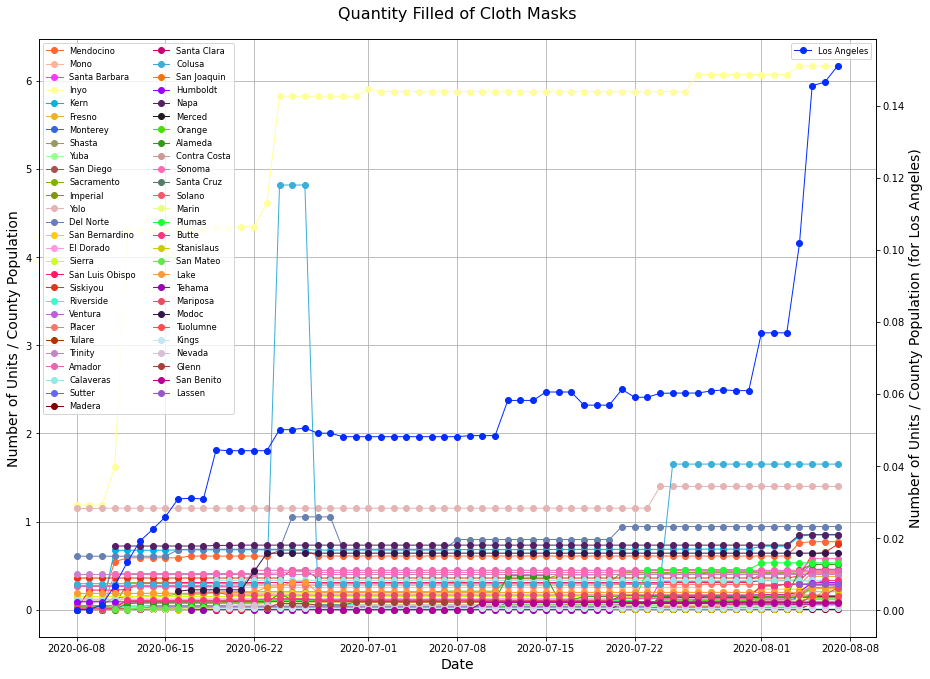

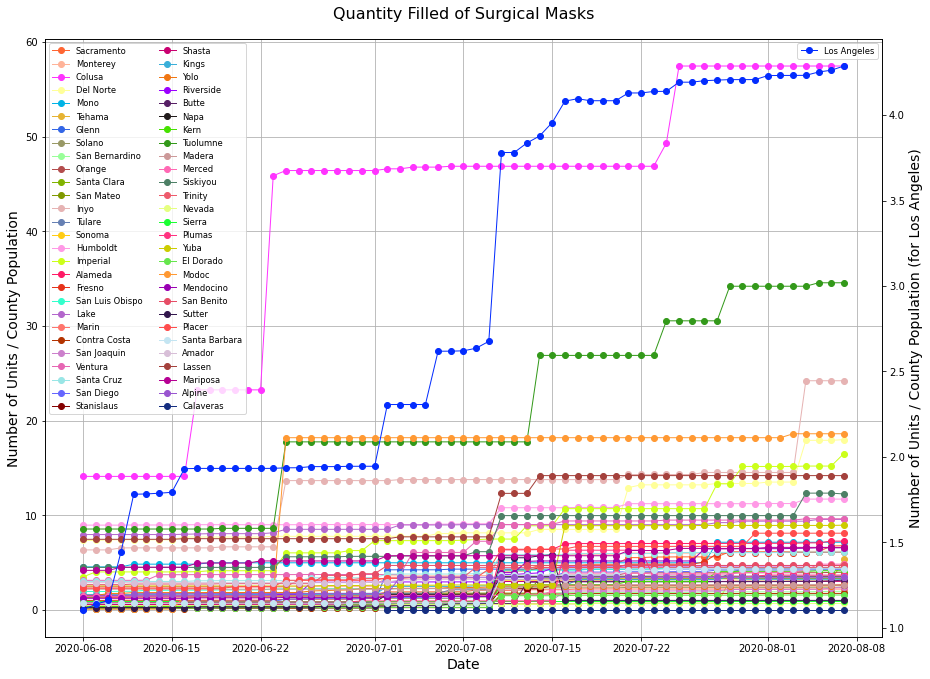

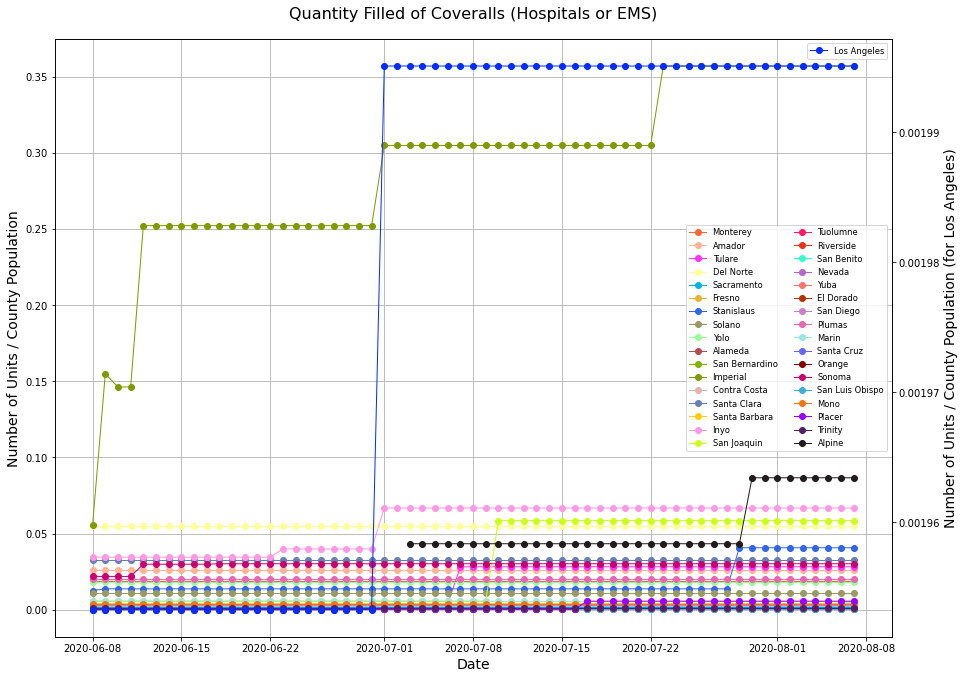

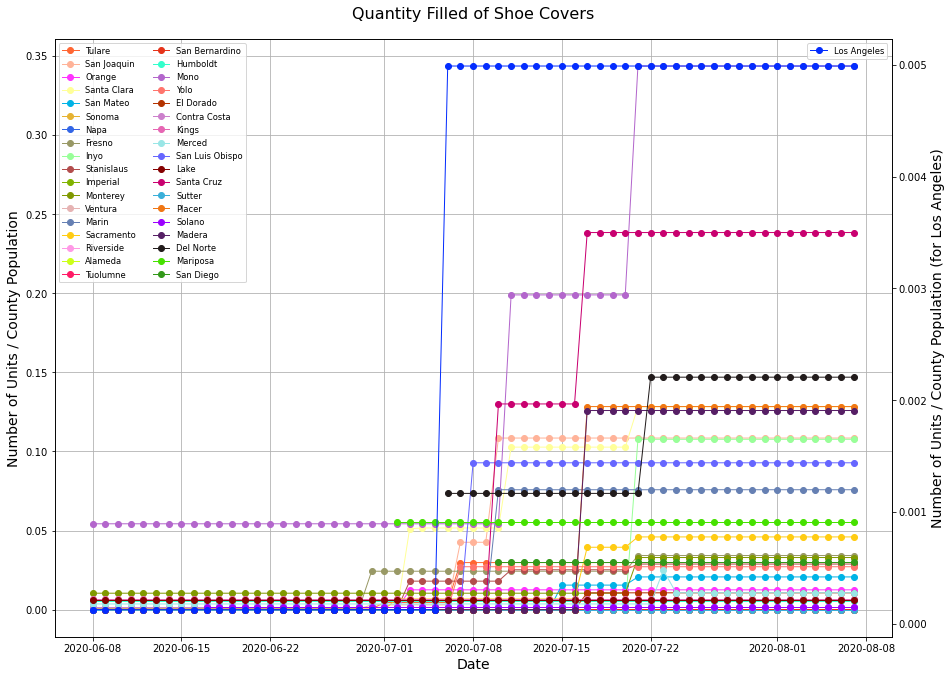

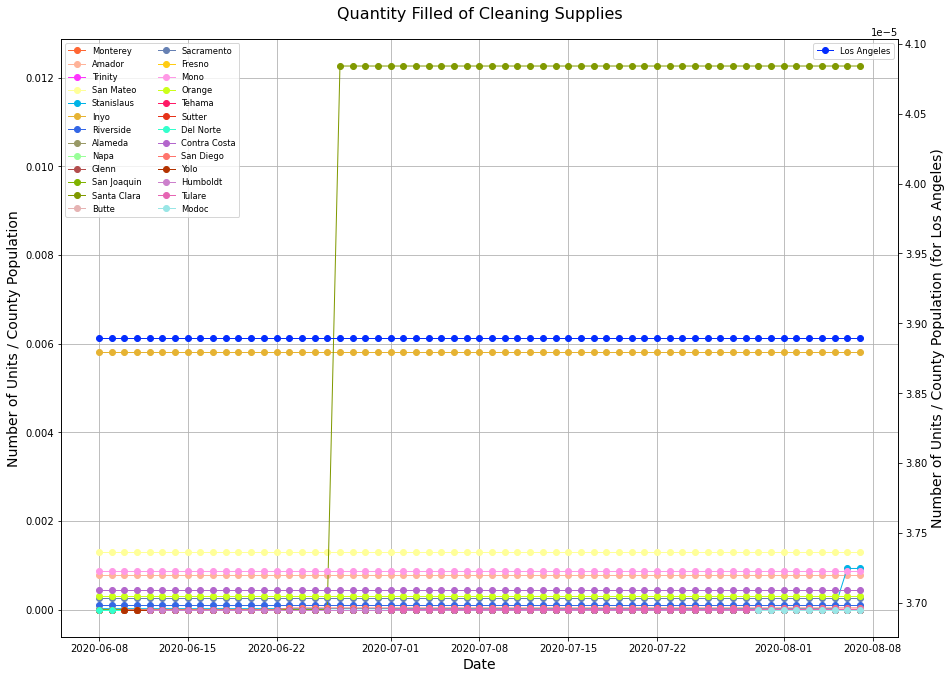

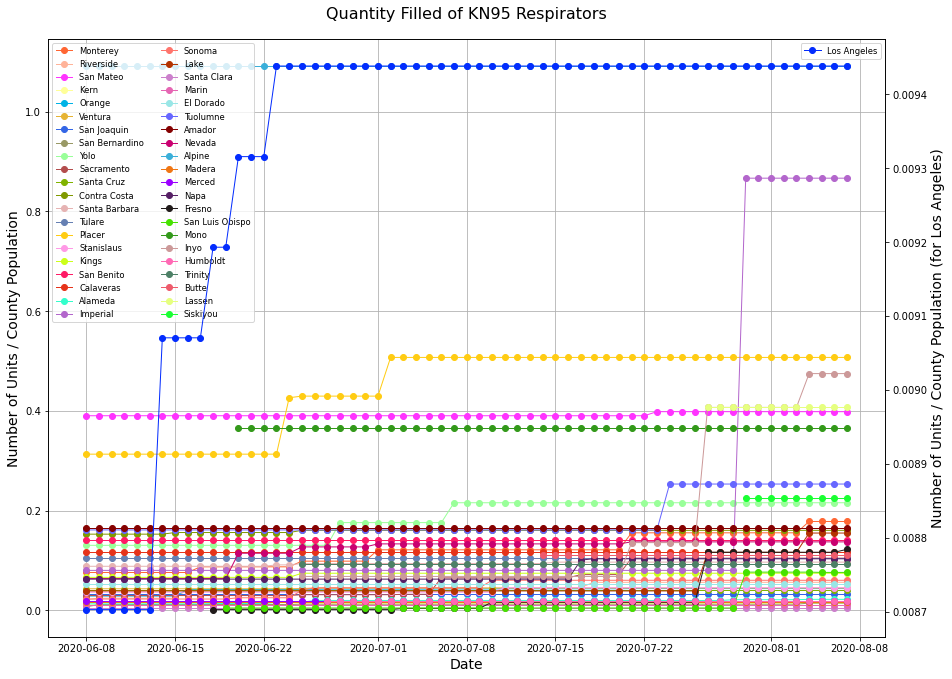

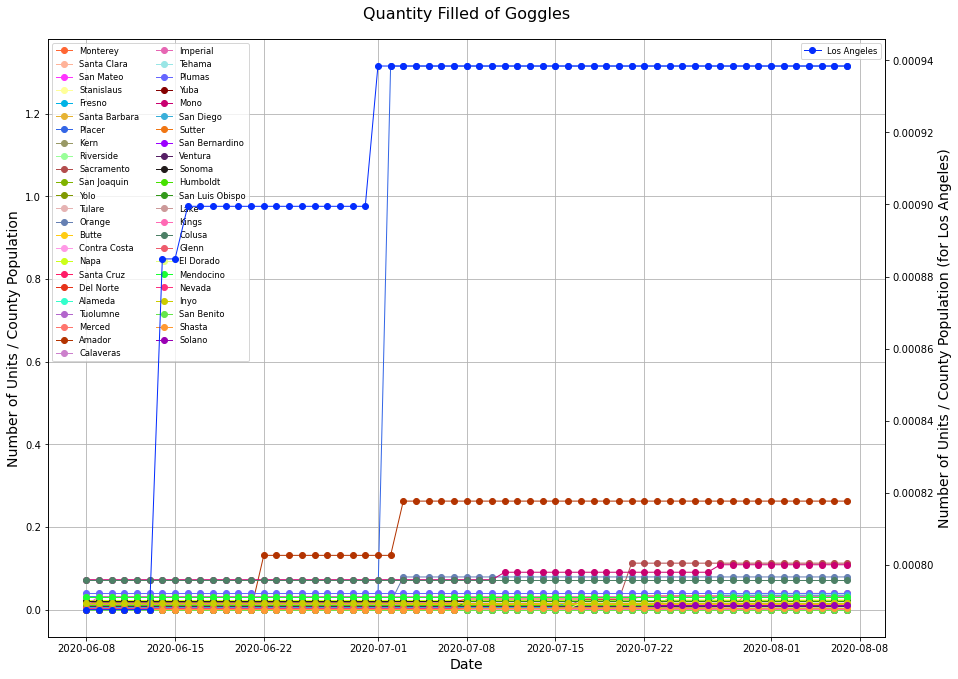

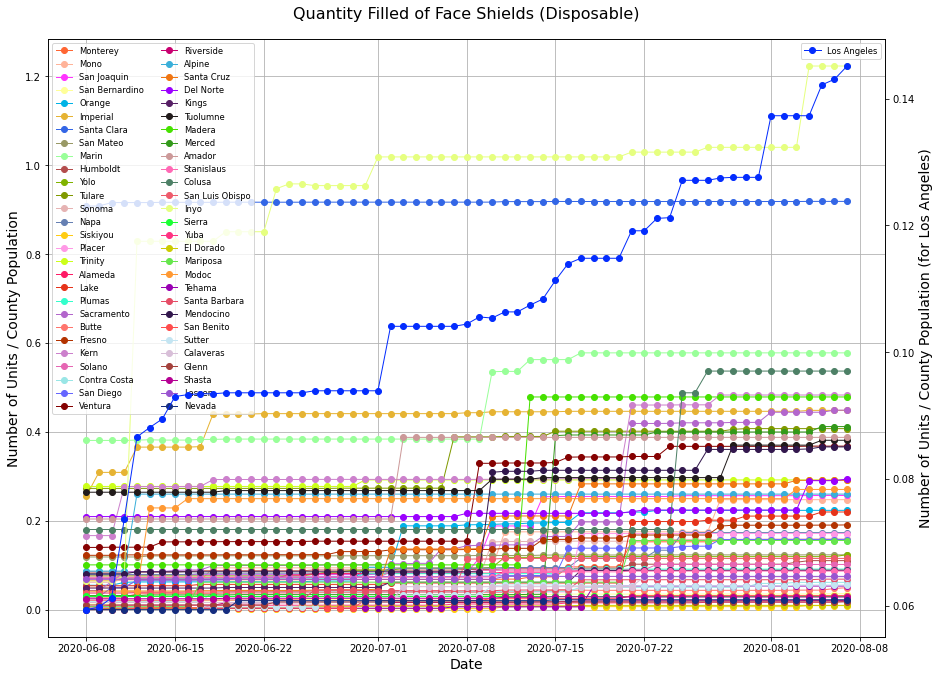

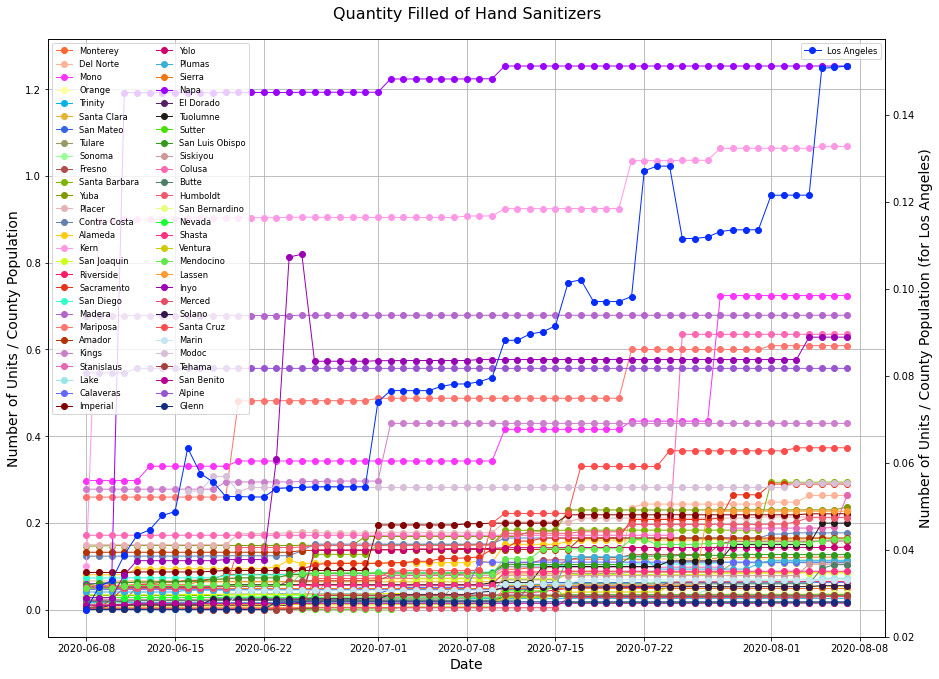

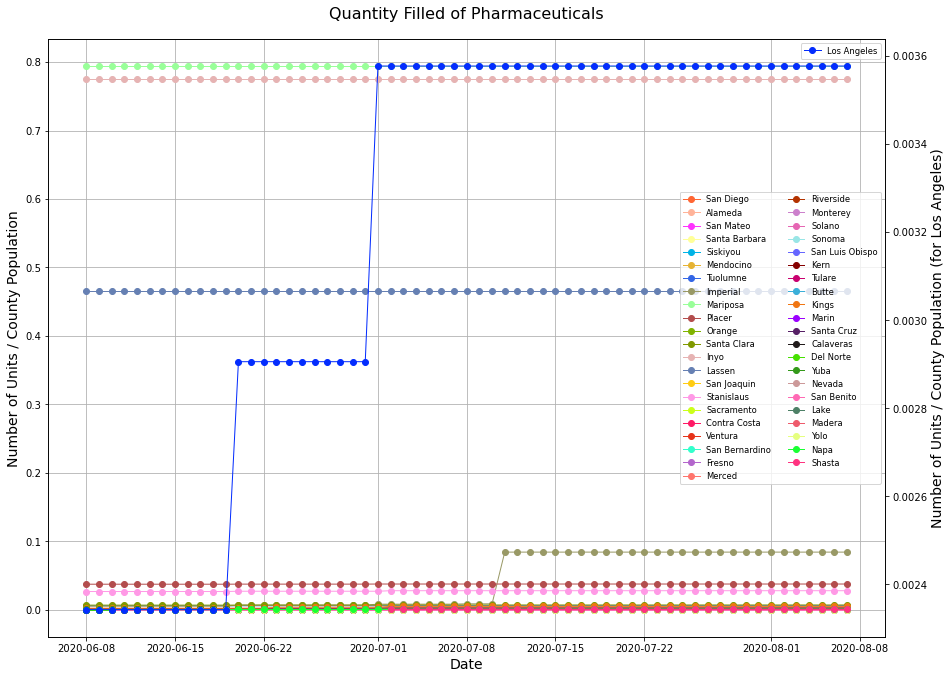

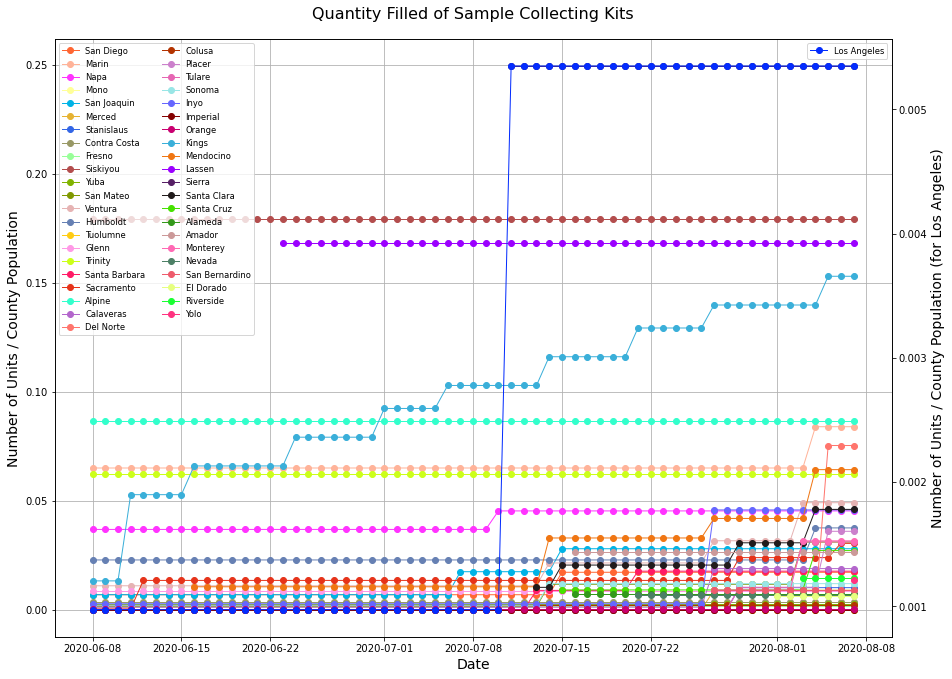

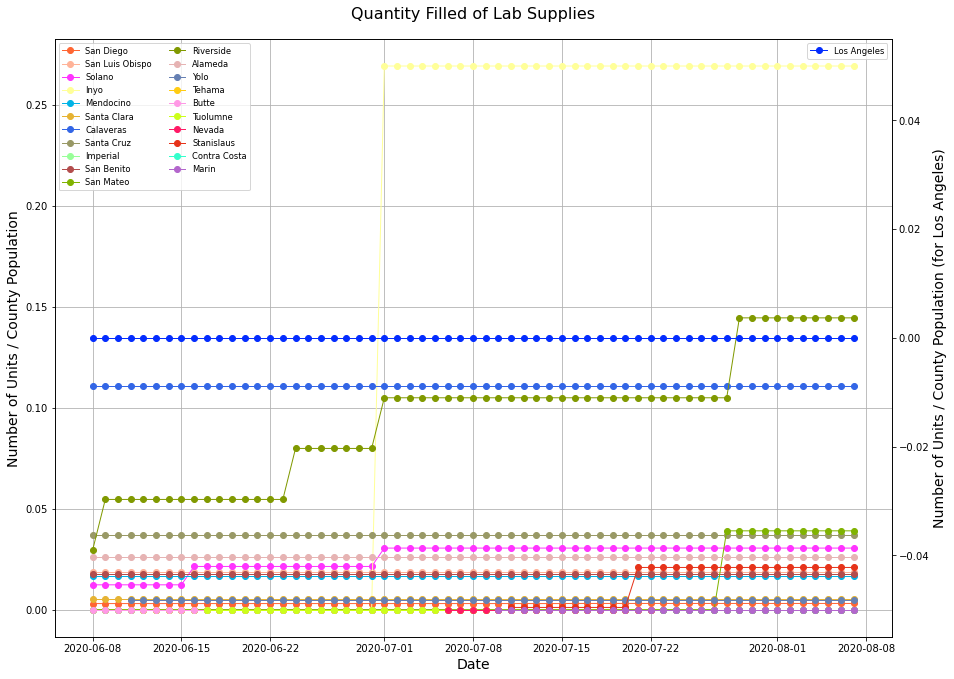

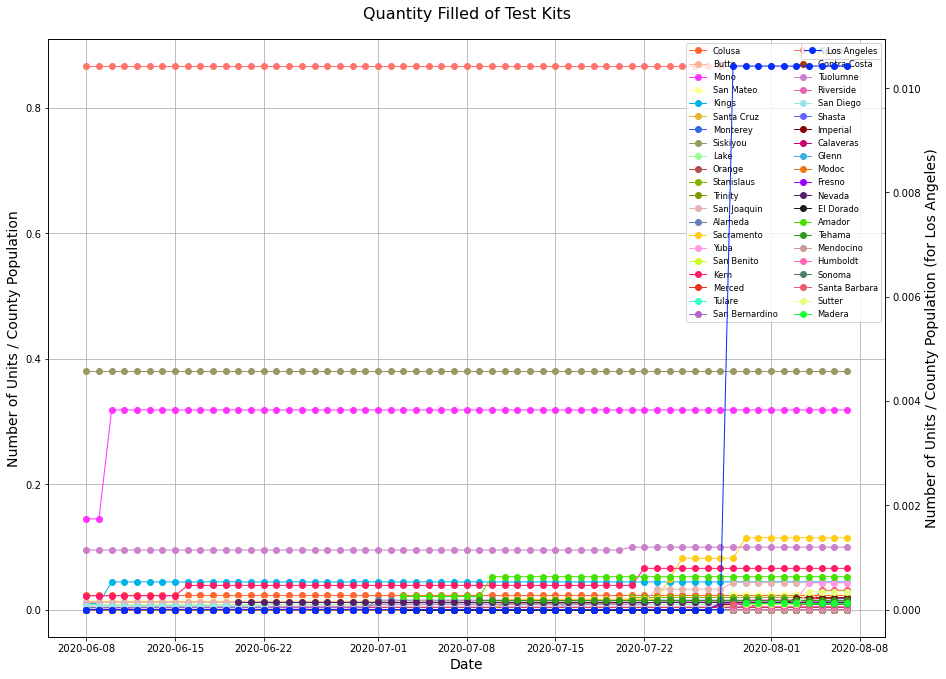

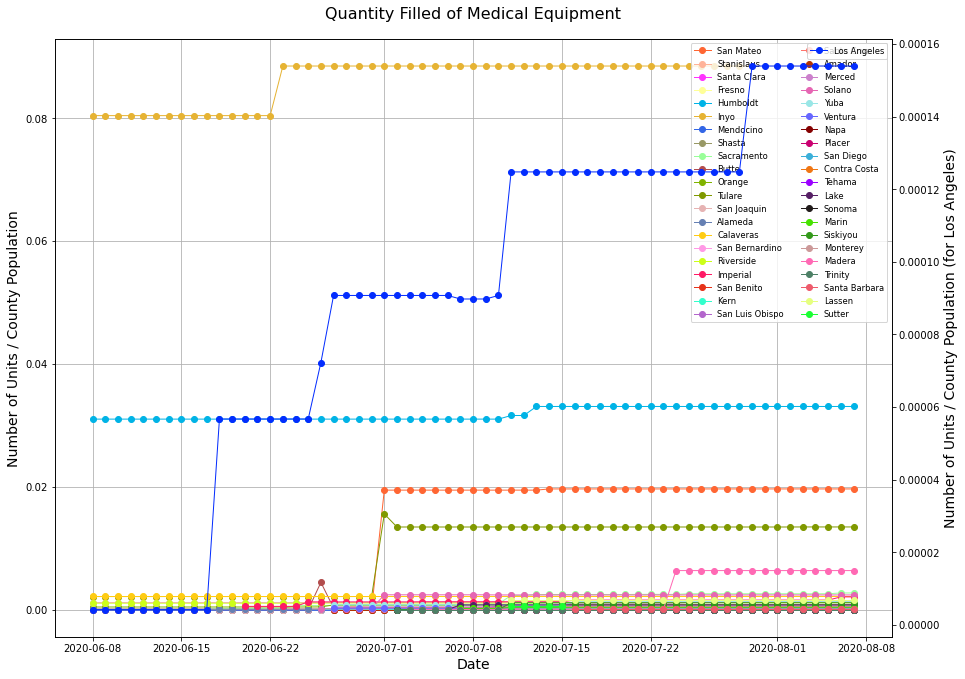

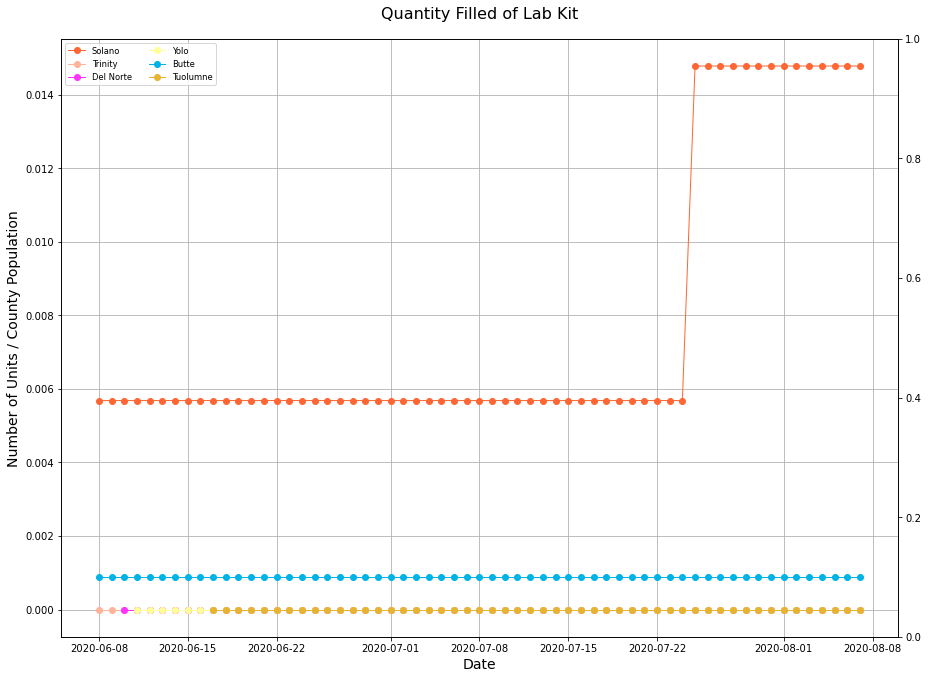

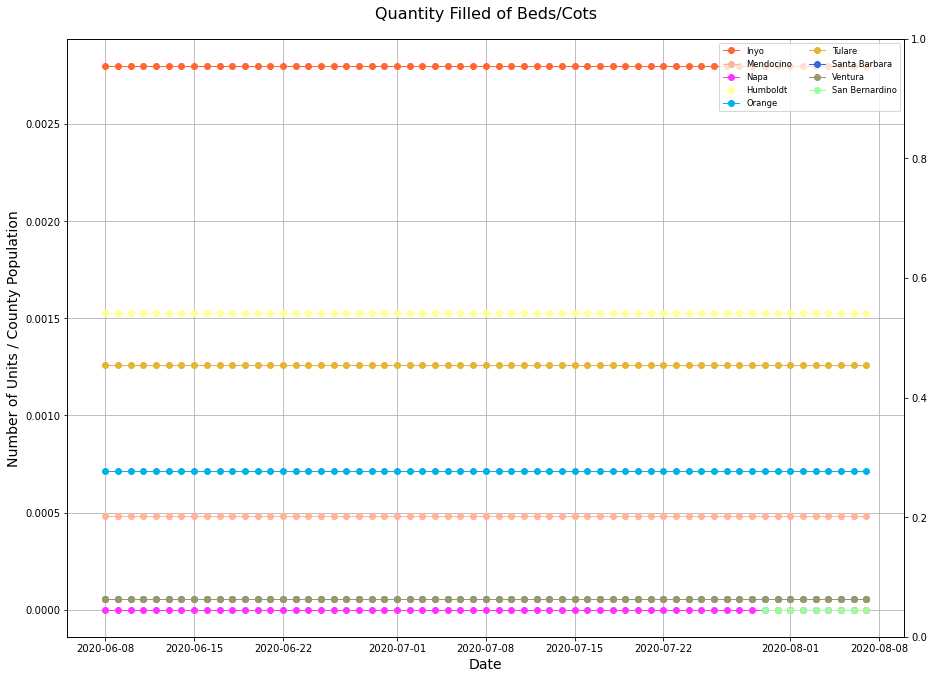

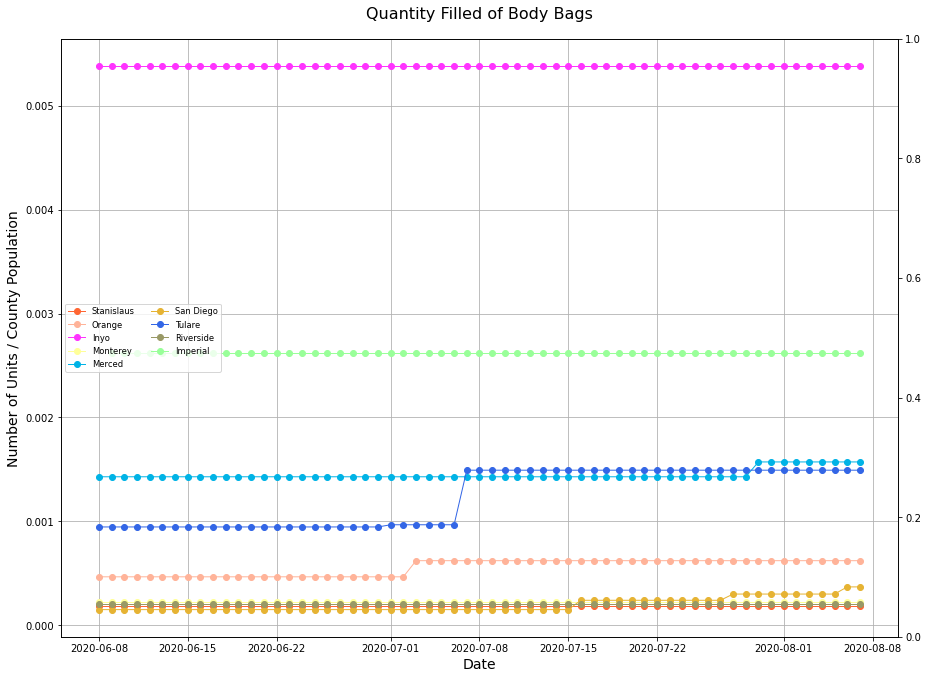

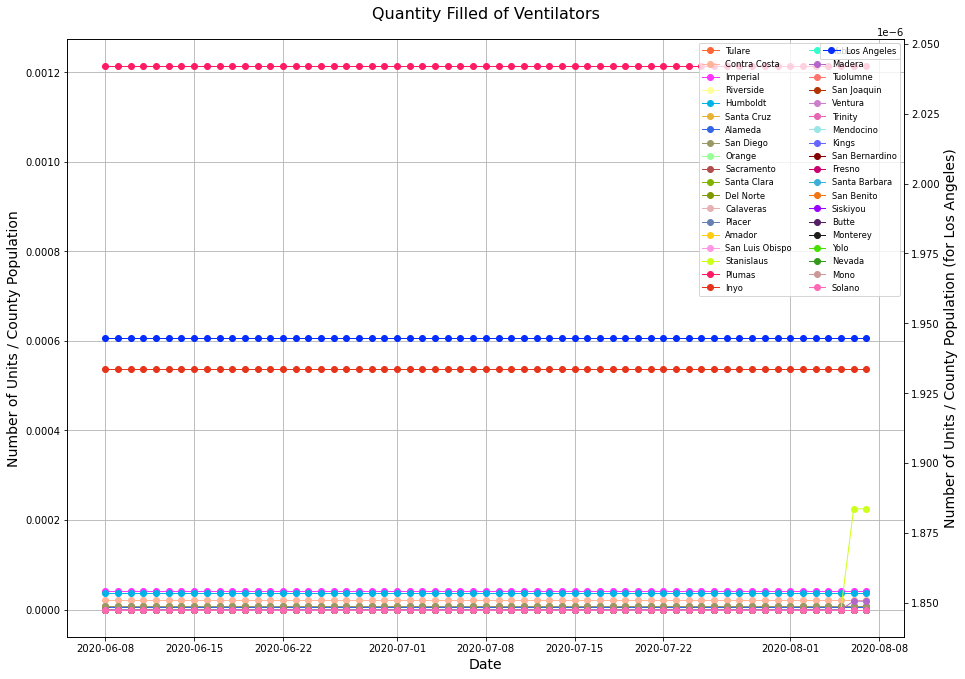

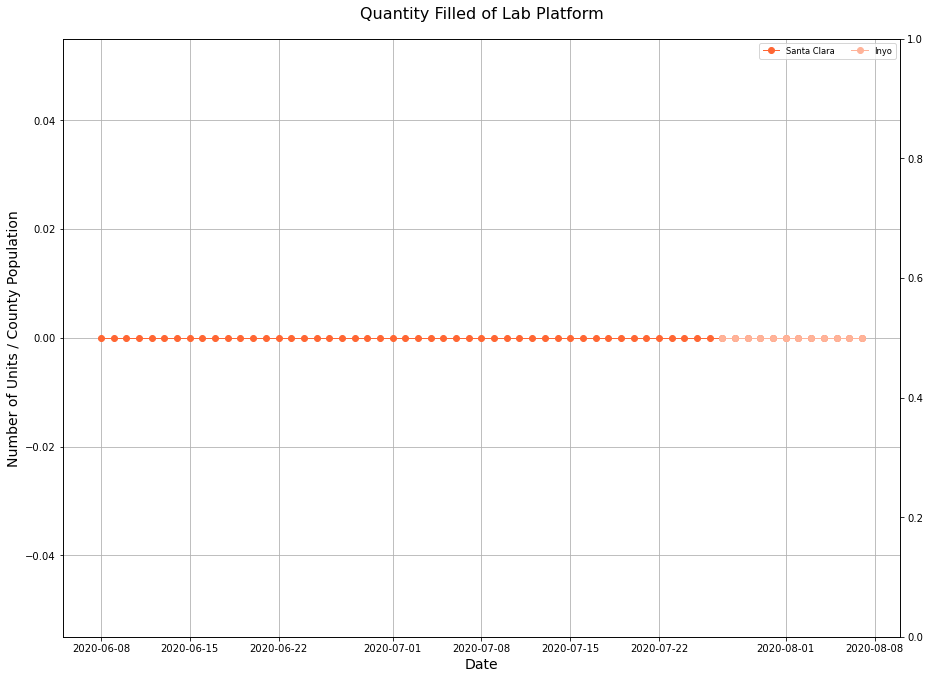

In [12]:
for category in df['product_family'].unique():
    
    #plot configurations
    fig,ax = plt.subplots()
    fig.set_size_inches(15, 11, forward=True)
    ax2=ax.twinx()
    color_count = 0
    
    #plotting quantity filled vs. as of date
    category_df = df.loc[df['product_family'] == category].copy()

    for county in category_df['county'].unique():
        county_df = category_df.loc[df['county'] == county].copy()
        county_filled = county_df.groupby(['as_of_date'])['quantity_filled'].sum().reset_index()
        county_filled = county_filled.sort_values(by=['as_of_date'])
   
        county_pop_df = pop_df.loc[pop_df['Entity Name'] == county].copy()
        if not county_pop_df.empty:
            pop = county_pop_df.iloc[0]['Estimated Population']
            county_filled['quantity_filled_over_pop'] = county_filled['quantity_filled']/pop

            county_filled = county_filled.dropna(subset=['quantity_filled_over_pop'])
            if not county_filled.empty and county != 'Los Angeles':
                ax.plot('as_of_date', 'quantity_filled_over_pop', data=county_filled, linewidth=1, label=county, color = color_array[color_count], marker = 'o')
                color_count+=1
            elif not county_filled.empty and county == 'Los Angeles':
                ax2.plot('as_of_date', 'quantity_filled_over_pop', data=county_filled, linewidth=1, label=county, color='#032CFE', marker='o')

    #setting labels
    plt.title('Quantity Filled of ' + category, fontsize=16, pad=20)
    ax.set_xlabel("Date",fontsize=14)
    ax.set_ylabel("Number of Units / County Population",fontsize=14)
    ax.legend(fontsize='small', ncol=2)
    ax.grid(True)
    
    if not category_df.loc[category_df['county'] == 'Los Angeles'].empty:
        ax2.set_ylabel("Number of Units (for Los Angeles)", fontsize=14)
        ax2.legend(fontsize='small', ncol=1)
        ax2.set_ylabel("Number of Units / County Population (for Los Angeles)",fontsize=14)
    
    plt.show()